NAME Of AUTHOR: PRAGYA PALIWAL

THE SPARKS FOUNDATION GRADUATE ROTATIONAL INTERNSHIP PROGRAM

DATA SCIENCE AND BUSINESS ANALYTICS

TASK - 2 (Prediction using Unsupervised Learning)

IMPORTING USEFUL LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("dataset.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


FEATURE EXTRACTION

In [6]:
features = dataset.drop(columns= ['Species' ,'Id'] )

In [7]:
features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

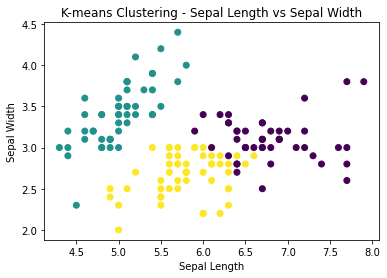

In [9]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the dataset
dataset['cluster'] = labels

# Visualize the clusters
plt.scatter(features['SepalLengthCm'], features['SepalWidthCm'], c=labels)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering - Sepal Length vs Sepal Width')
plt.show()

In [10]:
target = dataset['Species']
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [12]:
# Perform K-means clustering on the test set
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_test)
predictions = kmeans.predict(X_test)

# Calculate the Silhouette score
score = silhouette_score(X_test, predictions, metric="euclidean")

# Print the Silhouette score
print("Silhouette score is:", score)

Silhouette score is: 0.579836017446529


In [13]:
predictions

array([0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1])

C:\Users\paliw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


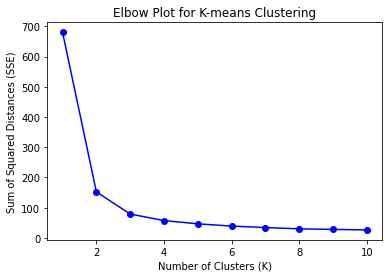

In [14]:
# Perform K-means clustering with different K values and plot the SSE
k_values = range(1, 11)  # Try K values from 1 to 10
sse = []  # Initialize an empty list to store SSE values

for k in k_values:
    kmeans = KMeans(n_clusters=k)  # Initialize the KMeans model with the current K value
    kmeans.fit(features)  # Fit the model to the data
    sse.append(kmeans.inertia_)  # Append the SSE value to the list

# Plot the SSE values against K values
plt.plot(k_values, sse, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Plot for K-means Clustering')
plt.show()